In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
import os
import pandas as pd
import glob

# List all files in the dataset folder
print(os.listdir("/kaggle/input/hormones-and-temperature-cleaned"))



# Use glob to match the CSV file automatically

files = glob.glob("/kaggle/input/hormones-and-temperature-cleaned/*.csv")
print("Found CSV files:", files)

# Load the first CSV found
df = pd.read_csv(files[0])
raw = df.copy()

df.head()


['hormones_and_temperature_cleaned.csv']
Found CSV files: ['/kaggle/input/hormones-and-temperature-cleaned/hormones_and_temperature_cleaned.csv']


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,study_interval,is_weekend,day_in_study,phase,lh,estrogen,pdg,flow_volume,flow_color,...,sleep_start_timestamp,sleep_end_day_in_study,sleep_end_timestamp,temperature_samples,nightly_temperature,type,baseline_relative_sample_sum,baseline_relative_sample_sum_of_squares,baseline_relative_nightly_standard_deviation,baseline_relative_sample_standard_deviation
0,1,2022,True,1,Follicular,2.9,94.2,NaN,Not at all,Not at all,...,0:08:00,1.0,10:25:30,414.0,34.616087,SKIN,NaN,NaN,NaN,NaN
1,1,2022,False,2,Follicular,1.2,226.3,NaN,Not at all,Not at all,...,23:54:00,2.0,7:10:00,258.0,33.780659,SKIN,NaN,NaN,NaN,NaN
2,1,2022,False,3,Follicular,3.5,276.8,NaN,Not at all,Not at all,...,0:14:00,3.0,9:04:00,353.0,34.634929,SKIN,6.651304,1554.843599,0.487865,2.101622
3,1,2022,False,4,Fertility,1.8,322.1,NaN,Not at all,Not at all,...,0:12:30,4.0,7:42:00,446.0,34.050056,SKIN,-126.224891,1161.909368,0.424570,1.839029
4,1,2022,False,5,Fertility,4.6,244.9,NaN,Not at all,Not at all,...,0:22:00,6.0,6:38:00,269.0,34.223197,SKIN,0.000000,766.896151,0.368295,1.803428


In [8]:
# Shape and info
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Dataset shape: (2937, 33)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2937 non-null   int64  
 1   study_interval                                2937 non-null   int64  
 2   is_weekend                                    2937 non-null   bool   
 3   day_in_study                                  2937 non-null   int64  
 4   phase                                         2936 non-null   object 
 5   lh                                            2937 non-null   float64
 6   estrogen                                      2936 non-null   float64
 7   pdg                                           0 non-null      float64
 8   flow_volume                                   2937 non-null   object 
 9   flow_color            

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


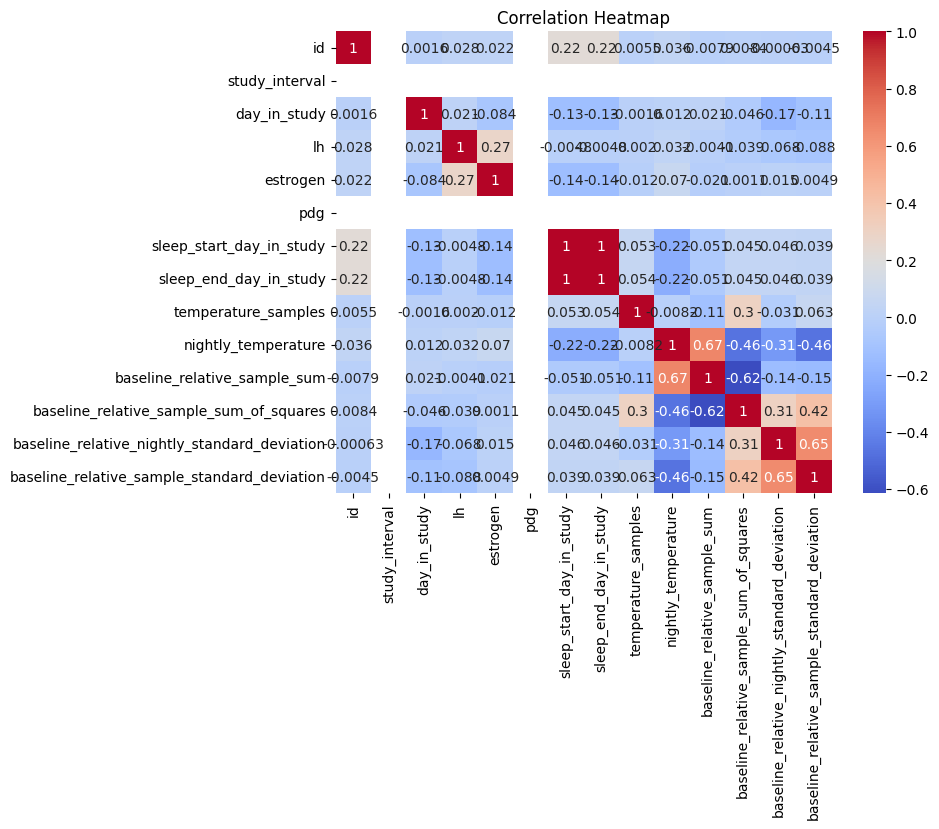

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()




In [10]:

# Drop rows where 'phase' is missing
df = df.dropna(subset=['phase']).reset_index(drop=True)


In [11]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# -----------------------------
# 1. Define Features (X) and Target (y)
# -----------------------------
X = df.drop(columns=['phase'])   # Features
y = df['phase']                  # Target

# Encode target labels (convert text -> numbers)
le = LabelEncoder()
y = le.fit_transform(y)

# -----------------------------
# 2. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# -----------------------------
# 3. Scale Numerical Features Only
# -----------------------------
# Select numeric columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()


X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:87: RuntimeWarning: invalid value encountered in less_equal
  return var <= upper_bound


In [12]:
# Cell 2: Initial data exploration
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())

print("\nMissing values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

Dataset shape: (2936, 33)

Columns: ['id', 'study_interval', 'is_weekend', 'day_in_study', 'phase', 'lh', 'estrogen', 'pdg', 'flow_volume', 'flow_color', 'appetite', 'exerciselevel', 'headaches', 'cramps', 'sorebreasts', 'fatigue', 'sleepissue', 'moodswing', 'stress', 'foodcravings', 'indigestion', 'bloating', 'sleep_start_day_in_study', 'sleep_start_timestamp', 'sleep_end_day_in_study', 'sleep_end_timestamp', 'temperature_samples', 'nightly_temperature', 'type', 'baseline_relative_sample_sum', 'baseline_relative_sample_sum_of_squares', 'baseline_relative_nightly_standard_deviation', 'baseline_relative_sample_standard_deviation']

Missing values:
pdg                                             2936
baseline_relative_sample_standard_deviation      147
baseline_relative_nightly_standard_deviation     147
baseline_relative_sample_sum_of_squares          147
baseline_relative_sample_sum                     147
estrogen                                           1
sleep_end_day_in_study     

In [13]:
# Cell 3: Select relevant features and create subset
relevant_features = ['phase', 'lh', 'estrogen', 'nightly_temperature', 
                    'temperature_samples', 'id', 'day_in_study']

# Create a subset with relevant features
df_subset = df[relevant_features].copy()

print("Subset shape:", df_subset.shape)
print("\nMissing values in subset:")
print(df_subset.isnull().sum())

Subset shape: (2936, 7)

Missing values in subset:
phase                  0
lh                     0
estrogen               1
nightly_temperature    0
temperature_samples    0
id                     0
day_in_study           0
dtype: int64


In [14]:
# Cell 4: Handle missing values
# Fill missing values with median for numerical columns
df_subset['lh'].fillna(df_subset['lh'].median(), inplace=True)
df_subset['estrogen'].fillna(df_subset['estrogen'].median(), inplace=True)
df_subset['nightly_temperature'].fillna(df_subset['nightly_temperature'].median(), inplace=True)
df_subset['temperature_samples'].fillna(df_subset['temperature_samples'].median(), inplace=True)

# Drop rows where phase is missing
df_subset = df_subset.dropna(subset=['phase'])

print("After handling missing values:")
print(df_subset.isnull().sum())

After handling missing values:
phase                  0
lh                     0
estrogen               0
nightly_temperature    0
temperature_samples    0
id                     0
day_in_study           0
dtype: int64


/tmp/ipykernel_36/132113592.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_subset['lh'].fillna(df_subset['lh'].median(), inplace=True)
/tmp/ipykernel_36/132113592.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [15]:
# Cell 5: Encode target variable and create period start feature
# Encode the target variable (phase)
le = LabelEncoder()
df_subset['phase_encoded'] = le.fit_transform(df_subset['phase'])

print("Phase encoding mapping:")
for i, phase in enumerate(le.classes_):
    print(f"{i}: {phase}")

Phase encoding mapping:
0: Fertility
1: Follicular
2: Luteal
3: Menstrual


In [16]:
# Cell 6: Create period start detection features
# Sort by ID and day to ensure proper sequencing
df_subset = df_subset.sort_values(['id', 'day_in_study'])

# Create features that capture transitions between phases
df_subset['prev_phase'] = df_subset.groupby('id')['phase'].shift(1)
df_subset['next_phase'] = df_subset.groupby('id')['phase'].shift(-1)

# Mark period start (transition to Menstrual from other phases)
df_subset['period_start'] = ((df_subset['phase'] == 'Menstrual') & 
                            (df_subset['prev_phase'] != 'Menstrual')).astype(int)

# For some individuals, the first day might be menstrual
df_subset['is_first_day'] = df_subset.groupby('id')['day_in_study'].transform('min') == df_subset['day_in_study']
df_subset.loc[(df_subset['is_first_day']) & (df_subset['phase'] == 'Menstrual'), 'period_start'] = 1

print("Period start distribution:")
print(df_subset['period_start'].value_counts())

Period start distribution:
period_start
0    2812
1     124
Name: count, dtype: int64


In [17]:
# Cell 7: Prepare features and split data
feature_columns = ['lh', 'estrogen', 'nightly_temperature', 'temperature_samples']

X = df_subset[feature_columns]
y_phase = df_subset['phase_encoded']
y_period = df_subset['period_start']

X_train, X_test, y_phase_train, y_phase_test, y_period_train, y_period_test = train_test_split(
    X, y_phase, y_period, test_size=0.2, random_state=42, stratify=y_phase
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (2348, 4)
Test set shape: (588, 4)


In [19]:
# Cell 8: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed")

Feature scaling completed


In [20]:
# Cell 9: Phase prediction model
print("=== PHASE PREDICTION MODEL ===")
phase_model = RandomForestClassifier(n_estimators=100, random_state=42)
phase_model.fit(X_train_scaled, y_phase_train)

y_phase_pred = phase_model.predict(X_test_scaled)
phase_accuracy = accuracy_score(y_phase_test, y_phase_pred)

print(f"Phase prediction accuracy: {phase_accuracy:.2f}")
print("\nClassification Report for Phase Prediction:")
print(classification_report(y_phase_test, y_phase_pred, target_names=le.classes_))

=== PHASE PREDICTION MODEL ===
Phase prediction accuracy: 0.40

Classification Report for Phase Prediction:
              precision    recall  f1-score   support

   Fertility       0.49      0.45      0.47       131
  Follicular       0.34      0.35      0.35       149
      Luteal       0.41      0.55      0.47       194
   Menstrual       0.30      0.15      0.20       114

    accuracy                           0.40       588
   macro avg       0.38      0.37      0.37       588
weighted avg       0.39      0.40      0.39       588



In [21]:
# Cell 10: Period start prediction model
print("=== PERIOD START PREDICTION MODEL ===")
period_model = RandomForestClassifier(n_estimators=100, random_state=42)
period_model.fit(X_train_scaled, y_period_train)

y_period_pred = period_model.predict(X_test_scaled)
period_accuracy = accuracy_score(y_period_test, y_period_pred)

print(f"Period start prediction accuracy: {period_accuracy:.2f}")
print("\nClassification Report for Period Start Prediction:")
print(classification_report(y_period_test, y_period_pred, target_names=['Not Start', 'Start']))

=== PERIOD START PREDICTION MODEL ===
Period start prediction accuracy: 0.96

Classification Report for Period Start Prediction:
              precision    recall  f1-score   support

   Not Start       0.96      1.00      0.98       566
       Start       0.00      0.00      0.00        22

    accuracy                           0.96       588
   macro avg       0.48      0.50      0.49       588
weighted avg       0.93      0.96      0.94       588



In [22]:
# Cell 11: Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance_phase': phase_model.feature_importances_,
    'importance_period': period_model.feature_importances_
}).sort_values('importance_phase', ascending=False)

print("Feature Importance for Phase Prediction:")
print(feature_importance[['feature', 'importance_phase']])

print("\nFeature Importance for Period Start Prediction:")
print(feature_importance[['feature', 'importance_period']])

Feature Importance for Phase Prediction:
               feature  importance_phase
1             estrogen          0.270535
0                   lh          0.250806
2  nightly_temperature          0.244960
3  temperature_samples          0.233699

Feature Importance for Period Start Prediction:
               feature  importance_period
1             estrogen           0.303142
0                   lh           0.162101
2  nightly_temperature           0.281534
3  temperature_samples           0.253223


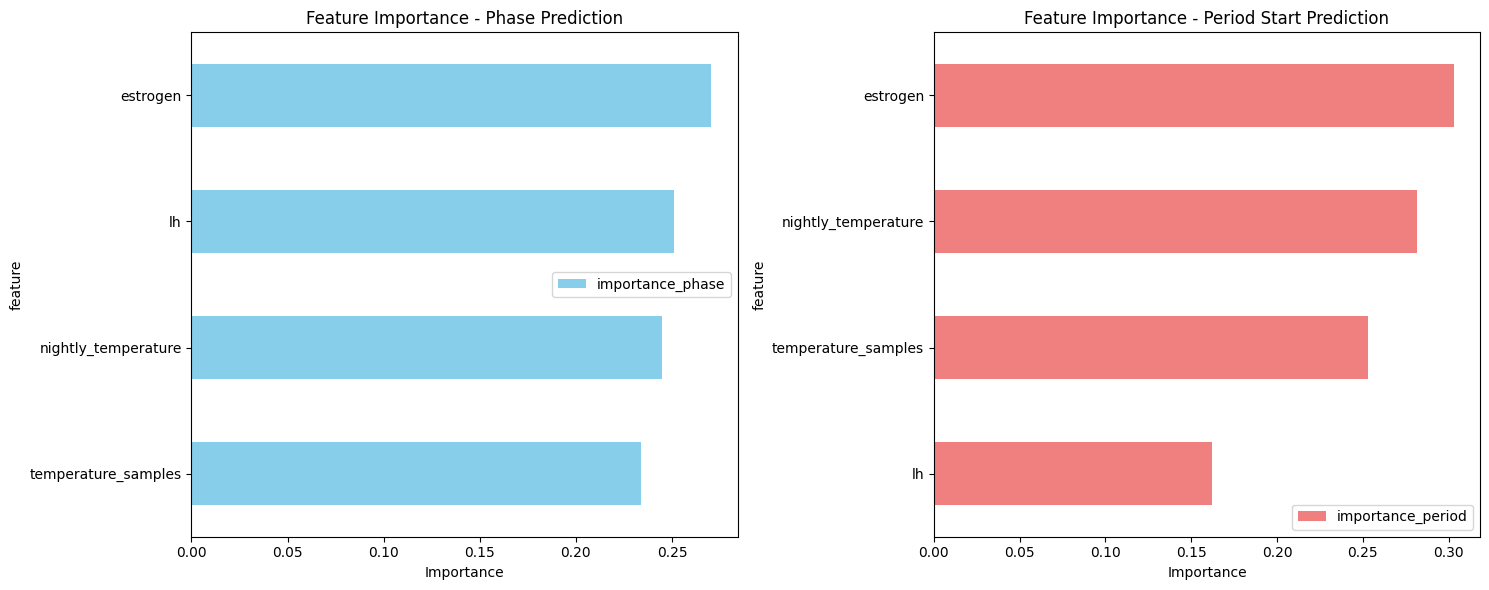

In [23]:
# Cell 12: Visualize feature importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

feature_importance.sort_values('importance_phase', ascending=True).plot(
    x='feature', y='importance_phase', kind='barh', ax=ax1, color='skyblue'
)
ax1.set_title('Feature Importance - Phase Prediction')
ax1.set_xlabel('Importance')

feature_importance.sort_values('importance_period', ascending=True).plot(
    x='feature', y='importance_period', kind='barh', ax=ax2, color='lightcoral'
)
ax2.set_title('Feature Importance - Period Start Prediction')
ax2.set_xlabel('Importance')

plt.tight_layout()
plt.show()

In [27]:
# Cell 13: Create prediction function
def predict_menstrual_phase(lh, estrogen, nightly_temp, temp_samples):
    """
    Predict menstrual phase and period start probability
    
    Parameters:
    lh: Luteinizing hormone level
    estrogen: Estrogen level
    pdg: Progesterone level
    nightly_temp: Nightly temperature
    temp_samples: Number of temperature samples
    
    Returns:
    Dictionary with phase prediction and period start probability
    """
    # Prepare input data
    input_data = np.array([[lh, estrogen,nightly_temp, temp_samples]])
    input_scaled = scaler.transform(input_data)
    
    # Predict phase
    phase_pred = phase_model.predict(input_scaled)[0]
    phase_name = le.inverse_transform([phase_pred])[0]
    
    # Predict period start probability
    period_prob = period_model.predict_proba(input_scaled)[0][1]
    
    return {
        'predicted_phase': phase_name,
        'period_start_probability': round(period_prob, 3),
        'is_likely_period_start': period_prob > 0.5
    }

# Example usage
sample_data = {
    'lh': 5.0,
    'estrogen': 150.0,
    'nightly_temp': 34.0,
    'temp_samples': 400
}

prediction = predict_menstrual_phase(**sample_data)
print(f"\nSample Prediction: {prediction}")


Sample Prediction: {'predicted_phase': 'Luteal', 'period_start_probability': 0.02, 'is_likely_period_start': False}


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

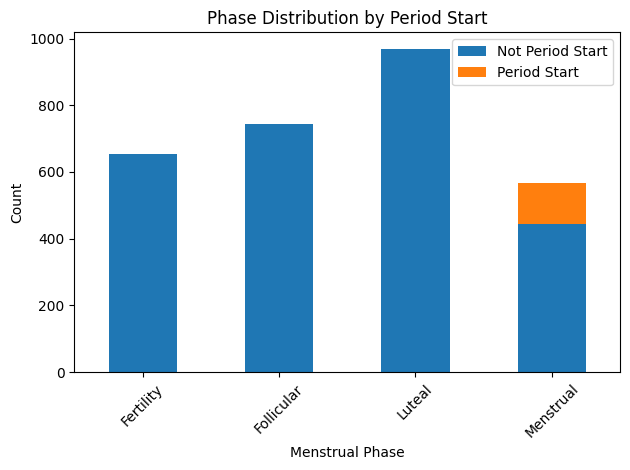

In [28]:
# Cell 14: Additional analysis - Phase distribution by period start
plt.figure(figsize=(10, 6))
phase_period_cross = pd.crosstab(df_subset['phase'], df_subset['period_start'])
phase_period_cross.plot(kind='bar', stacked=True)
plt.title('Phase Distribution by Period Start')
plt.xlabel('Menstrual Phase')
plt.ylabel('Count')
plt.legend(['Not Period Start', 'Period Start'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


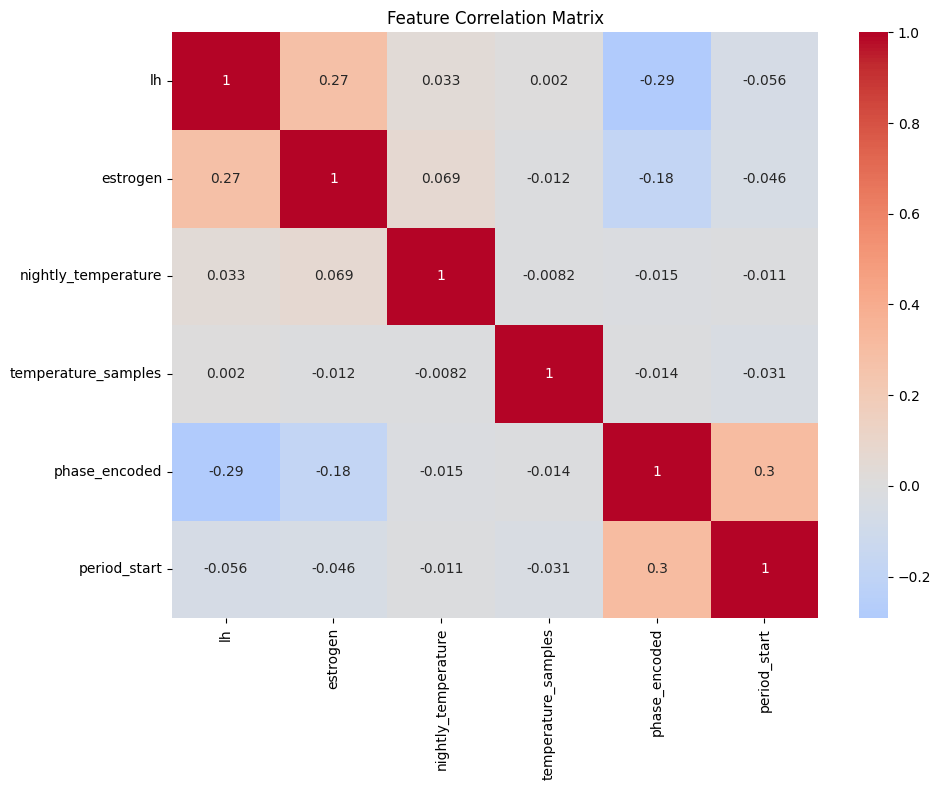

In [31]:

# Cell 15: Additional visualization - Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_subset[feature_columns + ['phase_encoded', 'period_start']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()